In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]



loo = LeaveOneOut()
loo_scores = [] 

## Splitting & Using SVM


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_classifier = SVC(kernel='linear')  

svm_classifier.fit(X_train, y_train)
test_score = svm_classifier.score(X_test, y_test)
y_pred = svm_classifier.predict(X_test)



In [5]:
# from sklearn.model_selection import cross_val_predict, KFold

# num_folds = 5
# svm_classifier = SVC(kernel='linear')
# kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# y_pred = cross_val_predict(svm_classifier, X, y, cv=kf)


## Using Evaluation Metrics

Accuracy =  87.32394366197182 %
Precision =  0.755331088664422
Recall =  0.7462732128680404
F1-score =  0.7490966599048879


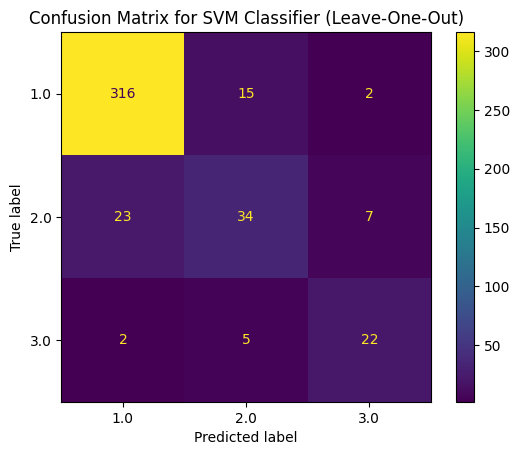

Classification Report
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       333
         2.0       0.63      0.53      0.58        64
         3.0       0.71      0.76      0.73        29

    accuracy                           0.87       426
   macro avg       0.76      0.75      0.75       426
weighted avg       0.87      0.87      0.87       426



In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='macro'))
print("Recall = ", recall_score(y_test, y_pred,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred,average='macro'))
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for SVM Classifier (Leave-One-Out)')
plt.show()
# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



In [7]:
# train_sizes, train_scores, test_scores = learning_curve(svm_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# plt.figure()
# plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
# plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
# plt.xlabel("Training examples")
# plt.ylabel("Score")
# plt.title("Learning Curve")
# plt.legend(loc="best")
# plt.show()

Top Feature Indices:
Feature Index 2
Feature Index 8
Feature Index 1
Feature Index 3
Feature Index 15
Feature Index 20


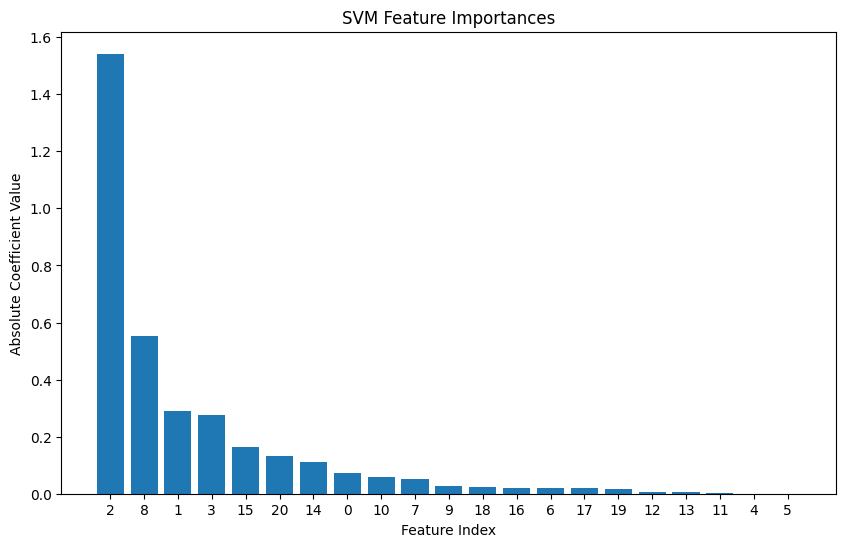

In [8]:
coefficients = svm_classifier.coef_[0]

sorted_indices = np.argsort(np.abs(coefficients))[::-1]

print("Top Feature Indices:")
for idx in sorted_indices[:6]: 
    print(f"Feature Index {idx}")

plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), np.abs(coefficients[sorted_indices]), tick_label=sorted_indices)
plt.xlabel('Feature Index')
plt.ylabel('Absolute Coefficient Value')
plt.title('SVM Feature Importances')
plt.show()


In [9]:
top_k_features_indices = sorted_indices[:10]
print("Indices of Important Features:", top_k_features_indices)

X_selected = X.iloc[:, top_k_features_indices]


print("Adjusted X based on Important Features:")
print(X_selected)


Indices of Important Features: [ 2  8  1  3 15 20 14  0 10  7]
Adjusted X based on Important Features:
      fetal_movement  mean_value_of_short_term_variability  accelerations  \
0              0.000                                   0.5          0.000   
1              0.000                                   2.1          0.006   
2              0.000                                   2.1          0.003   
3              0.000                                   2.4          0.003   
4              0.000                                   2.4          0.007   
...              ...                                   ...            ...   
2121           0.000                                   0.2          0.000   
2122           0.000                                   0.4          0.001   
2123           0.000                                   0.4          0.001   
2124           0.000                                   0.4          0.001   
2125           0.002                              

## Checking class distribution

Class Distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64
Coefficient of Variation (CV): 1.1595095195631708


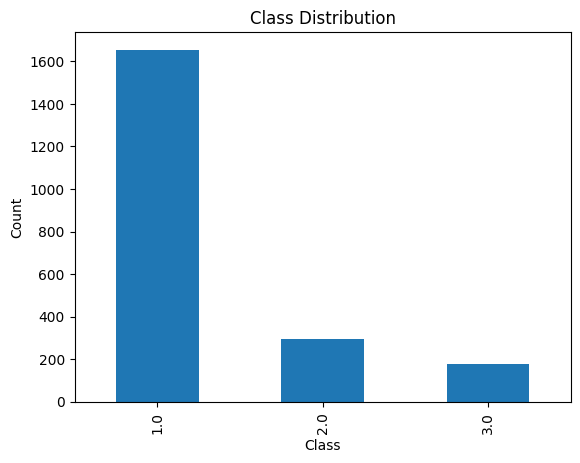

In [10]:

target_column = 'fetal_health'

class_distribution = df[target_column].value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Applying SMOTE


In [11]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Apply SMOTE only on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)




Class Distribution:
fetal_health
1.0    1322
2.0    1322
3.0    1322
Name: count, dtype: int64
Coefficient of Variation (CV): 0.0


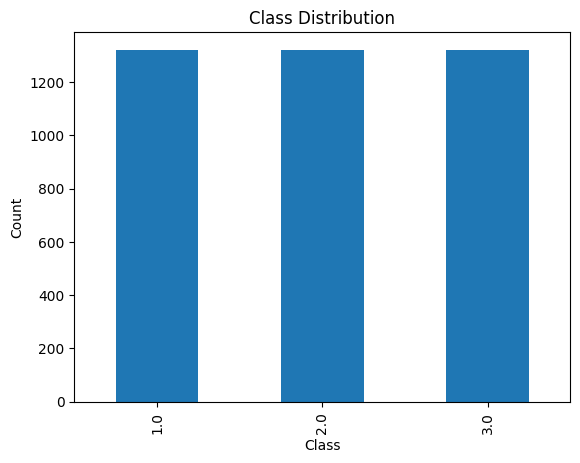

In [12]:

y_resampled_series = pd.Series(y_resampled)

class_distribution = y_resampled_series.value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Using SVM

In [13]:

from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


svm_after_smote = SVC(kernel='linear', random_state=42)


svm_after_smote.fit(X_resampled, y_resampled)

y_pred_full = svm_after_smote.predict(X_resampled)
y_pred_test = svm_after_smote.predict(X_test)



Accuracy (Resampled): 80.48411497730712 %
Precision (macro, Resampled): 0.8061893832458868
Recall (macro, Resampled): 0.8048411497730711
F1-score (macro, Resampled): 0.8038500922085875
Confusion Matrix (Resampled):


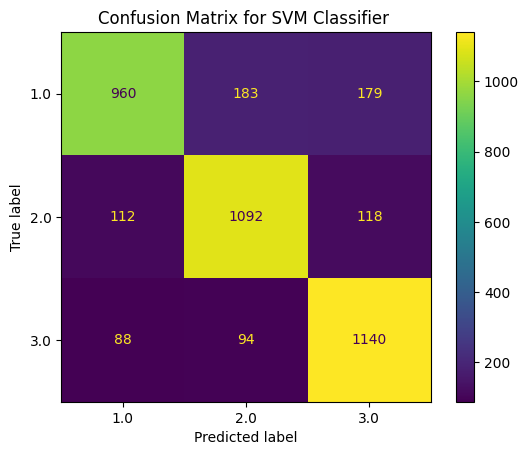

Classification Report (Resampled):
              precision    recall  f1-score   support

         1.0       0.83      0.73      0.77      1322
         2.0       0.80      0.83      0.81      1322
         3.0       0.79      0.86      0.83      1322

    accuracy                           0.80      3966
   macro avg       0.81      0.80      0.80      3966
weighted avg       0.81      0.80      0.80      3966

Test Accuracy: 69.24882629107981 %
Test Precision (macro): 0.5648396458110773
Test Recall (macro): 0.7490852921887404
Test F1-score (macro): 0.5882137785808176


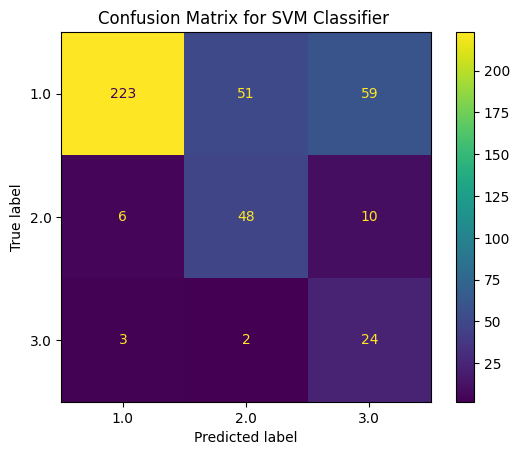

In [14]:
accuracy_resampled = accuracy_score(y_resampled, y_pred_full)
precision_resampled = precision_score(y_resampled, y_pred_full, average='macro')
recall_resampled = recall_score(y_resampled, y_pred_full, average='macro')
f1_resampled = f1_score(y_resampled, y_pred_full, average='macro')

conf_matrix_resampled = confusion_matrix(y_resampled, y_pred_full)
class_report_resampled = classification_report(y_resampled, y_pred_full)

print("Accuracy (Resampled):", accuracy_resampled * 100, "%")
print("Precision (macro, Resampled):", precision_resampled)
print("Recall (macro, Resampled):", recall_resampled)
print("F1-score (macro, Resampled):", f1_resampled)

print("Confusion Matrix (Resampled):")
conf_matrix = confusion_matrix(y_resampled, y_pred_full)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for SVM Classifier ')
plt.show()
print("Classification Report (Resampled):")
print(class_report_resampled)


test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='macro')
test_recall = recall_score(y_test, y_pred_test, average='macro')
test_f1 = f1_score(y_test, y_pred_test, average='macro')
test_conf_matrix = confusion_matrix(y_test, y_pred_test)

print("Test Accuracy:", test_accuracy * 100, "%")
print("Test Precision (macro):", test_precision)
print("Test Recall (macro):", test_recall)
print("Test F1-score (macro):", test_f1)

conf_matrix = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for SVM Classifier ')
plt.show()



## Using Evaluation Metrics

Accuracy (Resampled): 80.48411497730712 %
Precision (macro, Resampled): 0.8061893832458868
Recall (macro, Resampled): 0.8048411497730711
F1-score (macro, Resampled): 0.8038500922085875
Confusion Matrix (Resampled):


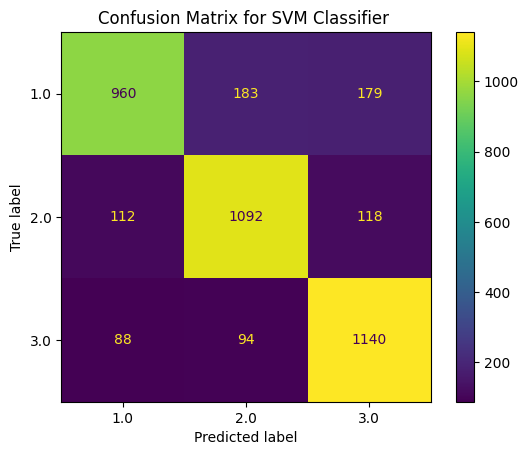

Classification Report (Resampled):
              precision    recall  f1-score   support

         1.0       0.83      0.73      0.77      1322
         2.0       0.80      0.83      0.81      1322
         3.0       0.79      0.86      0.83      1322

    accuracy                           0.80      3966
   macro avg       0.81      0.80      0.80      3966
weighted avg       0.81      0.80      0.80      3966

Test Accuracy: 69.24882629107981 %
Test Precision (macro): 0.5648396458110773
Test Recall (macro): 0.7490852921887404
Test F1-score (macro): 0.5882137785808176


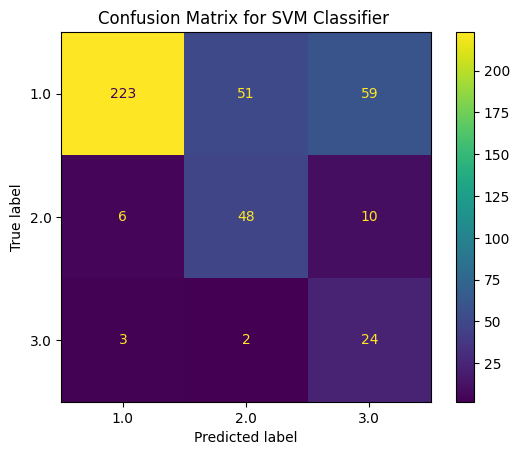

In [15]:
accuracy_resampled = accuracy_score(y_resampled, y_pred_full)
precision_resampled = precision_score(y_resampled, y_pred_full, average='macro')
recall_resampled = recall_score(y_resampled, y_pred_full, average='macro')
f1_resampled = f1_score(y_resampled, y_pred_full, average='macro')

conf_matrix_resampled = confusion_matrix(y_resampled, y_pred_full)
class_report_resampled = classification_report(y_resampled, y_pred_full)

print("Accuracy (Resampled):", accuracy_resampled * 100, "%")
print("Precision (macro, Resampled):", precision_resampled)
print("Recall (macro, Resampled):", recall_resampled)
print("F1-score (macro, Resampled):", f1_resampled)

print("Confusion Matrix (Resampled):")
conf_matrix = confusion_matrix(y_resampled, y_pred_full)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for SVM Classifier ')
plt.show()
print("Classification Report (Resampled):")
print(class_report_resampled)


test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='macro')
test_recall = recall_score(y_test, y_pred_test, average='macro')
test_f1 = f1_score(y_test, y_pred_test, average='macro')
test_conf_matrix = confusion_matrix(y_test, y_pred_test)

print("Test Accuracy:", test_accuracy * 100, "%")
print("Test Precision (macro):", test_precision)
print("Test Recall (macro):", test_recall)
print("Test F1-score (macro):", test_f1)

conf_matrix = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for SVM Classifier ')
plt.show()



In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# k-Fold with SMOTE
kf = KFold(n_splits=4, shuffle=True, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)
accuracy_scores_kfold = []
precision_scores_kfold = []
recall_scores_kfold = []
f1_scores_kfold = []

for train_index, test_index in kf.split(X_selected, y):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply SMOTE only on the training set
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Support Vector Machine on resampled training set
    svm_after = SVC(random_state=42)
    svm_after.fit(X_train_resampled, y_train_resampled)

    # Predictions on the test set
    y_pred_test = svm_after.predict(X_test)

    # Calculate metrics for the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='macro')
    recall_test = recall_score(y_test, y_pred_test, average='macro')
    f1_test = f1_score(y_test, y_pred_test, average='macro')

    accuracy_scores_kfold.append(accuracy_test)
    precision_scores_kfold.append(precision_test)
    recall_scores_kfold.append(recall_test)
    f1_scores_kfold.append(f1_test)

# Calculate mean scores across folds
mean_accuracy_kfold = np.mean(accuracy_scores_kfold)
mean_precision_kfold = np.mean(precision_scores_kfold)
mean_recall_kfold = np.mean(recall_scores_kfold)
mean_f1_kfold = np.mean(f1_scores_kfold)

print(f'k-Fold Metrics (Mean): Accuracy={mean_accuracy_kfold}, Precision={mean_precision_kfold}, Recall={mean_recall_kfold}, F1-Score={mean_f1_kfold}')


# Stratified k-Fold with SMOTE
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)
accuracy_scores_stratified_kfold = []
precision_scores_stratified_kfold = []
recall_scores_stratified_kfold = []
f1_scores_stratified_kfold = []

for train_index, test_index in skf.split(X_selected, y):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply SMOTE only on the training set
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Support Vector Machine on resampled training set
    svm_after = SVC(random_state=42)
    svm_after.fit(X_train_resampled, y_train_resampled)

    # Predictions on the test set
    y_pred_test = svm_after.predict(X_test)

    # Calculate metrics for the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='macro')
    recall_test = recall_score(y_test, y_pred_test, average='macro')
    f1_test = f1_score(y_test, y_pred_test, average='macro')

    accuracy_scores_stratified_kfold.append(accuracy_test)
    precision_scores_stratified_kfold.append(precision_test)
    recall_scores_stratified_kfold.append(recall_test)
    f1_scores_stratified_kfold.append(f1_test)

# Calculate mean scores across folds
mean_accuracy_stratified_kfold = np.mean(accuracy_scores_stratified_kfold)
mean_precision_stratified_kfold = np.mean(precision_scores_stratified_kfold)
mean_recall_stratified_kfold = np.mean(recall_scores_stratified_kfold)
mean_f1_stratified_kfold = np.mean(f1_scores_stratified_kfold)

print(f'Stratified k-Fold Metrics (Mean): Accuracy={mean_accuracy_stratified_kfold}, Precision={mean_precision_stratified_kfold}, Recall={mean_recall_stratified_kfold}, F1-Score={mean_f1_stratified_kfold}')


k-Fold Metrics (Mean): Accuracy=0.6956745677753706, Precision=0.5606798141446546, Recall=0.7170260172074591, F1-Score=0.5870742816605132
Stratified k-Fold Metrics (Mean): Accuracy=0.6961400676833327, Precision=0.5592069160156801, Recall=0.7088414308611966, F1-Score=0.5854282767600102


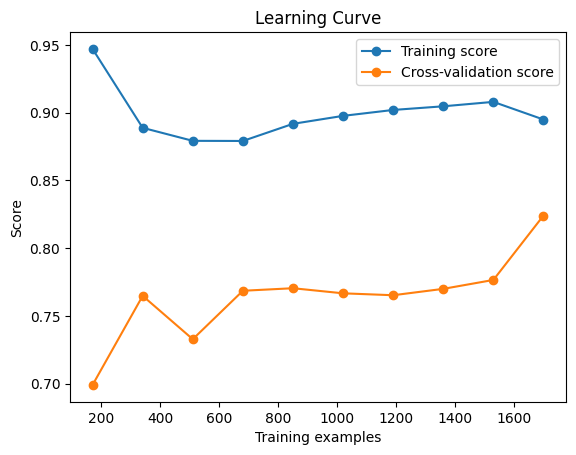

In [17]:
train_sizes, train_scores, test_scores = learning_curve(svm_after_smote, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

Top Feature Indices:
Feature Index 2
Feature Index 8
Feature Index 1
Feature Index 3
Feature Index 15
Feature Index 20


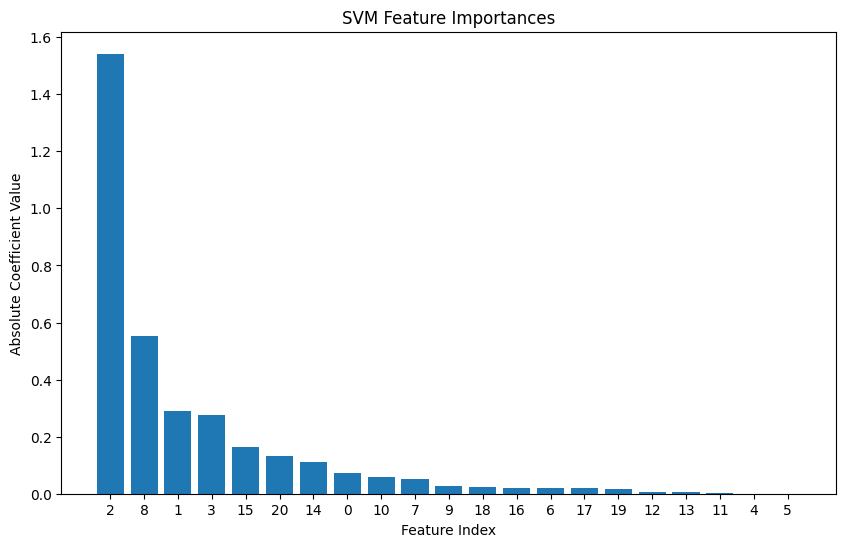

In [18]:
coefficients = svm_classifier.coef_[0]

sorted_indices = np.argsort(np.abs(coefficients))[::-1]

print("Top Feature Indices:")
for idx in sorted_indices[:6]: 
    print(f"Feature Index {idx}")

plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), np.abs(coefficients[sorted_indices]), tick_label=sorted_indices)
plt.xlabel('Feature Index')
plt.ylabel('Absolute Coefficient Value')
plt.title('SVM Feature Importances')
plt.show()
